# GRIP - THE SPARKS FOUNDATION
# DATA SCIENCE AND BUSINESS ANALYTICS INTERN
#### AUTHOR - SALIL KUMAR SHARMA
#### TASK 3: EXPLORATORY DATA ANALYSIS - RETAIL


Use the "Run" button to execute the code.

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# downloading the required dataset

!pip install opendatasets --upgrade --quiet
import opendatasets as od
download_url = 'https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view' 
od.download(download_url)

1113007it [00:00, 494103483.50it/s]

Downloaded to  ./SampleSuperstore.csv


In [3]:
# Reading the imported csv file

df = pd.read_csv('/content/SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Exploring Data

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
# Checking for data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
# Checking for null values

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

- So, there are no missing values in data

- There are 13 columns and 9994 rows

# Check for duplicates

In [7]:
# no. of duplicated rows

df.duplicated().sum()

17

- 17 duplicate values are found which is 0.17% of data. So, it can be deleted

In [8]:
#drop duplicated values

df = df.drop_duplicates()

In [9]:
#Summary of dataset after dropping duplicates

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


- Now there are 9977 rows in dataset

In [10]:
#unique no. of rows in each columns

df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

- The data is only for 1 country. We can remove the country column.
- Our data covers the details of sales of 49 states, 531 cities divided in 4 different regions.

In [11]:
#dropping unnecessary columns

df = df.drop('Country', axis=1)

# Exploring city, state, postal code, and region
- Every city has different Postal Codes, So we should drop one of the two columns.

In [12]:
#saving data in new variable after dropping postal code

new_data = df.drop('Postal Code' , axis=1)

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Region        9977 non-null   object 
 5   Category      9977 non-null   object 
 6   Sub-Category  9977 non-null   object 
 7   Sales         9977 non-null   float64
 8   Quantity      9977 non-null   int64  
 9   Discount      9977 non-null   float64
 10  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 935.3+ KB


# Checking Region

In [13]:
#Unique no. of regions

new_data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

There are only four regions. Looking at the data, we can see that we have three categorical variables, which are basically related.

- City :- Having the most number of unique values
- State :- Having number of unique values less than city
- Region :- Only four unique values

# Checking sub-category and category

In [14]:
#Comparing values in category, and subcategory

print(new_data['Sub-Category'].unique())
print(new_data['Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['Furniture' 'Office Supplies' 'Technology']


# Correlation check

In [15]:
attributes = ['Sales','Quantity','Discount','Profit']
corr_mat = new_data.corr()
corr_mat

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


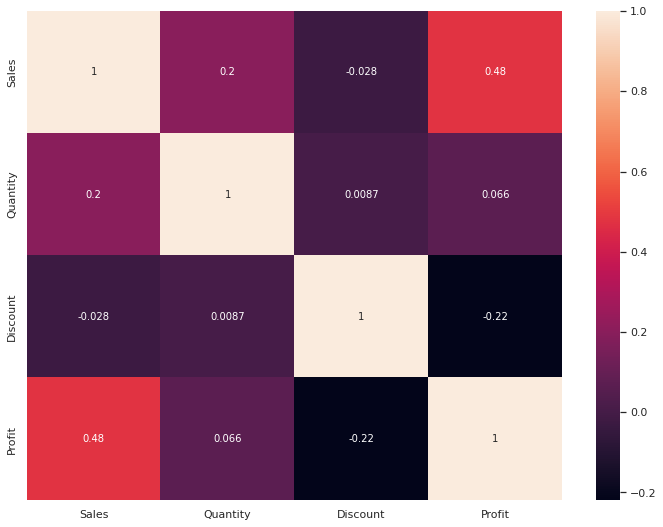

In [16]:
#plotting correlation matrix

plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat,annot=True)
plt.show()

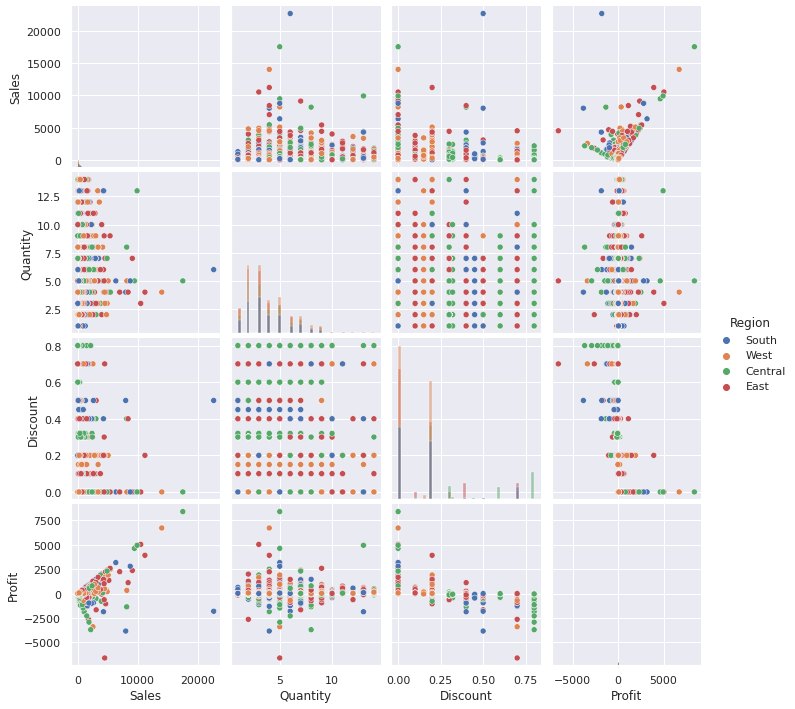

In [17]:
#plotting pair plot (Region wise)

sns.pairplot(new_data, hue='Region' , diag_kind="hist")

# It seems Profit is highly correlated with Sales.
- Sales v/s Profit

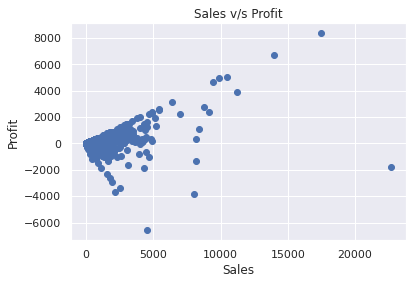

In [18]:
#scatter plot

plt.scatter(df['Sales'],df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales v/s Profit')
plt.show()

- At lower sales, a business either gets profit or loss. But, when the sales are high, a business mostly gets profit.

- Profit to Sales Ratio

In [19]:
#plotting profit v/s sales statewise

profit_to_sales = pd.DataFrame(new_data.groupby('State').sum()[['Sales','Profit']])
profit_to_sales['Profit_to_sales'] = profit_to_sales['Profit']/profit_to_sales['Sales']
profit_to_sales.sort_values(by='Profit_to_sales',inplace = True, ascending = False)
print("Highest 10 Ratios :\n")
print(profit_to_sales[:10])
print('='*70)
print("Lowest 10 Ratios:\n")
print(profit_to_sales[-10:])

Highest 10 Ratios :

                          Sales      Profit  Profit_to_sales
State                                                       
District of Columbia   2865.020   1059.5893         0.369837
Delaware              27451.069   9977.3748         0.363460
Minnesota             29863.150  10823.1874         0.362426
Maine                  1270.530    454.4862         0.357714
Arkansas              11678.130   4008.6871         0.343264
Indiana               53555.360  18382.9363         0.343251
Georgia               49095.840  16250.0433         0.330986
Montana                5589.352   1833.3285         0.328004
Rhode Island          22627.956   7285.6293         0.321975
Michigan              75879.644  24428.0903         0.321932
Lowest 10 Ratios:

                      Sales      Profit  Profit_to_sales
State                                                   
Florida          89473.7080  -3399.3017        -0.037992
Oregon           17420.7820  -1194.0993        -0.068545


- Ohio has the worst profit to sales ratio.
- District of Columbia has the highest profit to sales ratio.
- The states California , New York doesn't come in the list of top 10 states with highest profit to sales ratio that means there is still some room for improvement.

# Region-wise Analysis

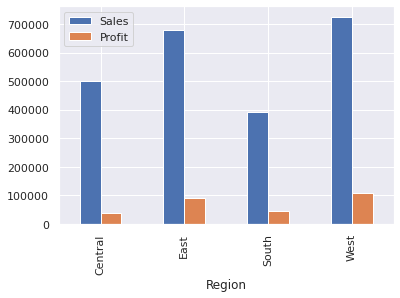

In [20]:
pd.DataFrame(new_data.groupby('Region').sum()[['Sales','Profit']]).plot(kind='bar')

- Western & Eastern regions have shown higher sales and profits as compared to the Southern and central regions.
- Central region has higher sales than the Southern region but it has shown lower profit gains between the two of them.

# State-wise Analysis

In [21]:
#Top 10 states with maximum number of items sold

new_data.groupby('State').count()['Quantity'].sort_values(ascending= False)[:10]

State
California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: Quantity, dtype: int64

In [22]:
#Top 10 states with minimum number of items sold

new_data.groupby('State').count()['Quantity'].sort_values()[:10]

State
Wyoming                  1
West Virginia            4
North Dakota             7
Maine                    8
District of Columbia    10
Vermont                 11
South Dakota            12
Montana                 15
Idaho                   21
Kansas                  24
Name: Quantity, dtype: int64

In [23]:
#total statewise sales in descending order

state_wise_sales = pd.DataFrame(new_data.groupby('State').sum()['Sales']).sort_values(by ='Sales',ascending= False)
state_wise_sales.reset_index(inplace=True)
state_wise_sales.head()

,State,Sales
0,California,457576.2715
1,New York,310827.1510
2,Texas,170124.5418
3,Washington,138560.8100
4,Pennsylvania,116496.3620


In [24]:
# Top 10 stores with maximum amount of sales

print('States with maximum amount of sales:\n',state_wise_sales[:10])

print('\n','='*50, '\n')

# Stores with minimum amount of sales
print('States with minimum amount of sales:\n',state_wise_sales[-10:])

States with maximum amount of sales:
           State        Sales
0    California  457576.2715
1      New York  310827.1510
2         Texas  170124.5418
3    Washington  138560.8100
4  Pennsylvania  116496.3620
5       Florida   89473.7080
6      Illinois   80162.5370
7          Ohio   77976.7640
8      Michigan   75879.6440
9      Virginia   70636.7200


States with minimum amount of sales:
                    State     Sales
39            New Mexico  4783.522
40                  Iowa  4579.760
41                 Idaho  4382.486
42                Kansas  2914.310
43  District of Columbia  2865.020
44               Wyoming  1603.136
45          South Dakota  1315.560
46                 Maine  1270.530
47         West Virginia  1209.824
48          North Dakota   919.910


In [25]:
# Top 10 states with maximum amount of profit

print('States with maximum amount of profit:\n',new_data.groupby('State').sum()['Profit'].sort_values(ascending= False)[:10])

print('\n','='*50, '\n')

# States with minimum amount of profit

print('States with minimum amount of profit:\n',new_data.groupby('State').sum()['Profit'].sort_values()[:10])

States with maximum amount of profit:
 State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


States with minimum amount of profit:
 State
Texas            -25750.9833
Ohio             -16959.3178
Pennsylvania     -15565.4035
Illinois         -12601.6500
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1194.0993
Name: Profit, dtype: float64


- Company must focus on cities which made loss.
- They should analyse their resource usage and the categories which are being sold in those states.

In [26]:
#new dataframe having states and regions
state_region = new_data[['State','Region']]

#drop duplicated values
state_region = state_region.drop_duplicates()
state_region

#adding region column to state_wise_sales dataframe
state_wise_sales = pd.merge(state_wise_sales, state_region)

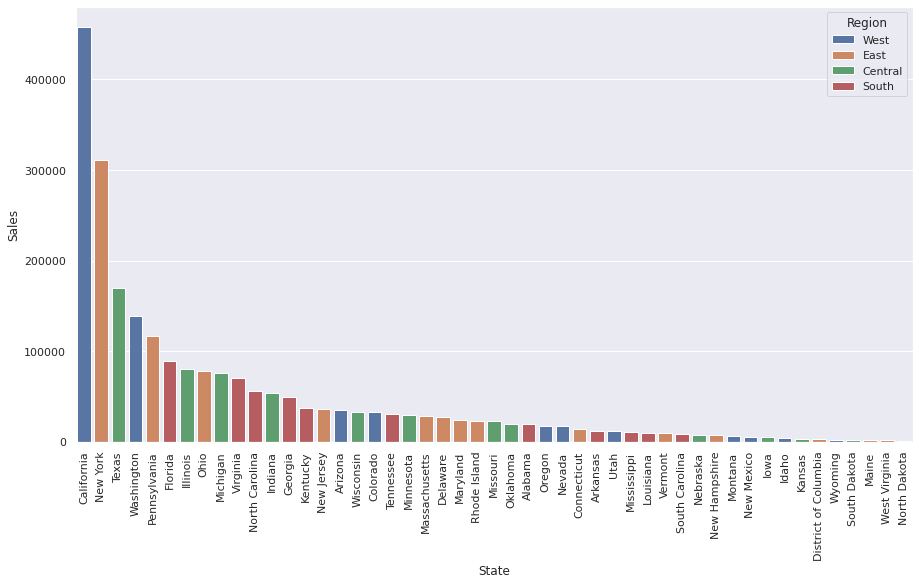

In [27]:
#plotting Sales Statewise

plt.figure(figsize=(15,8))
g= sns.barplot(x='State', y='Sales', data = state_wise_sales, hue='Region', dodge=False)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

# Conclusion

- The company has highest sales in the state of California which is around 450k.
- New York is the state that constitutes the second highest sales for the company of around 300k.
- The states of Texas and Washington end up 3rd and 4th on the chart with around 150k and 140k in sales correspondingly.
- Maximum of the sales are done in the west and the east coast regions.